In [15]:
import numpy as np
from wingstructure.structure import beammechanics as beam
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
# load geometry and define material for one section

import collections as col

LineIdealisation = col.namedtuple('LineIdealisation', 'geometry, thickness, youngsmoduli, shearmoduli')

geometry_section = np.load('contour.npy')

youngsmoduli_right = np.random.randint(1, 2, len(geometry_section[0])-1)*10**11
youngsmoduli_middle = np.random.randint(1, 2, len(geometry_section[1])-1)*10**11
youngsmoduli_left = np.random.randint(1, 2, len(geometry_section[2])-1)*10**11

shearmoduli_right = np.random.randint(1, 2, len(geometry_section[0])-1)*3*10**10
shearmoduli_middle = np.random.randint(1, 2, len(geometry_section[1])-1)*3*10**10
shearmoduli_left = np.random.randint(1, 2, len(geometry_section[2])-1)*3*10**10

thicknesses_right = 0.001*np.random.randint(2, 5, len(geometry_section[0])-1)
thicknesses_middle = 0.001*np.random.randint(7, 10, len(geometry_section[1])-1)
thicknesses_left = 0.001*np.random.randint(2, 5, len(geometry_section[2])-1)

youngsmoduli_section = youngsmoduli_right, youngsmoduli_middle, youngsmoduli_left
shearmoduli_section = shearmoduli_right, shearmoduli_middle, shearmoduli_left
thicknesses_section = thicknesses_right, thicknesses_middle, thicknesses_left

li  = LineIdealisation(geometry_section, 
                         thicknesses_section,
                         youngsmoduli_section,
                         shearmoduli_section);

In [23]:
generate_testsection = lambda : beam.Crosssection(li.geometry, li.youngsmoduli, li.shearmoduli, li.thickness)
testsections = [generate_testsection()]*60

In [25]:
# import lift data

import pickle as pkl

with open('export.pkl', 'rb') as afile:

    y, c, c_l, c_m = pkl.load(afile)
    # position, chord of wing, lift coefficient, moment coefficient
    
y = y[59:119] # halfspan
c = c[59:118]
c_l = c_l[59:118] # last one not because of equal length with distance
c_m = c_m[59:118] # is there a better way?

ρ = 1.225
v = 60 # random
c = 0.632 # constant

In [34]:
# calculate shearforce and torsional moment

distance = []
for i in range(0,len(y)-1):
    distance_i = y[i+1] - y[i]
    distance.append(distance_i)
    
lift = beam.lift(ρ, v, c_l, c)
moment = beam.moment(ρ, v, c_m, c)

Q = np.array((zeros(59), lift*distance)).T # shearforce
T = moment*distance # torsional moment
Q

array([[  0.        , 386.14297529],
       [  0.        , 387.39589822],
       [  0.        , 387.47929419],
       [  0.        , 386.73923086],
       [  0.        , 385.04891582],
       [  0.        , 382.52844864],
       [  0.        , 378.84941057],
       [  0.        , 374.04872736],
       [  0.        , 367.38027442],
       [  0.        , 358.67703397],
       [  0.        , 345.73463145],
       [  0.        , 327.18817782],
       [  0.        , 289.40145493],
       [  0.        , 195.24968185],
       [  0.        , 159.6080622 ],
       [  0.        , 144.26666552],
       [  0.        , 136.11378841],
       [  0.        , 134.22838113],
       [  0.        , 137.64084962],
       [  0.        , 147.42753545],
       [  0.        , 175.12953131],
       [  0.        , 253.94345526],
       [  0.        , 280.47914692],
       [  0.        , 289.19358079],
       [  0.        , 292.57539631],
       [  0.        , 292.0110233 ],
       [  0.        , 289.4864417 ],
 

In [30]:
# calculate twistangle for every section

twistangle = []
for i in range(0,len(testsections)-1):
    twist_i = testsections[i].twist(Q[i],T[i])*distance[i]
    twistangle.append(twist_i)
    
endangle = sum(twistangle)*180/pi

In [31]:
geol = testsections[0].geometries[0]
geom = testsections[0].geometries[1]
geor = testsections[0].geometries[2]

array([-0.0845494 , -0.01110559])

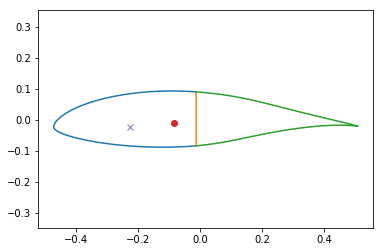

In [32]:
center = testsections[0].shearcenter()
t4 = testsections[0].t4_point()

plot(geol[:,0], geol[:,1])
plot(geom[:,0], geom[:,1])
plot(geor[:,0], geor[:,1])
plot(center[0], center[1], 'o')
plot(t4[0], t4[1], 'x')
axis('equal')
center

In [33]:
Q = [0,1]
T = 1
Q_new = beam.transform(np.array((Q)), testsections[0].Θ)
Q_new

array([0.00130445, 0.99999915])